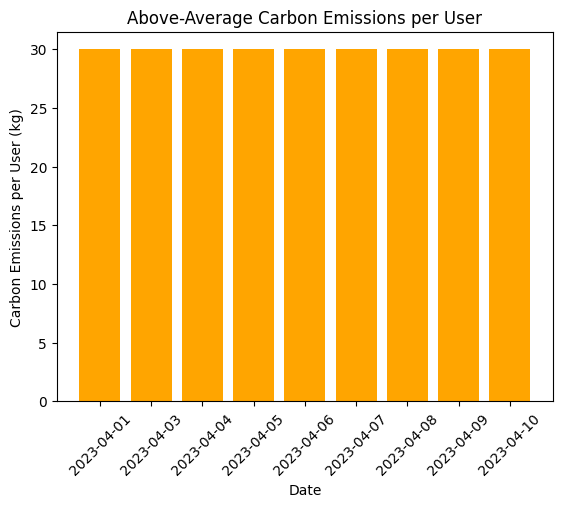

In [7]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Input the data as a string
data = """date,new_users,estimated_carbon_emissions_kg
2023-04-01,50,1500
2023-04-02,45,1300
2023-04-03,60,1800
2023-04-04,55,1650
2023-04-05,70,2100
2023-04-06,65,1950
2023-04-07,80,2400
2023-04-08,75,2250
2023-04-09,90,2700
2023-04-10,85,2550
"""

# Convert the data string into a pandas DataFrame
data = [row.split(',') for row in data.split('\n')]
df = pd.DataFrame(data[1:], columns=data[0])

# Convert date column to datetime format and other columns to numeric format
df['date'] = pd.to_datetime(df['date'])
df['new_users'] = pd.to_numeric(df['new_users'])
df['estimated_carbon_emissions_kg'] = pd.to_numeric(df['estimated_carbon_emissions_kg'])

# Calculate the average carbon emissions per user
df['emissions_per_user'] = df['estimated_carbon_emissions_kg'] / df['new_users']
average_emissions_per_user = df['emissions_per_user'].mean()

# Filter the data to only include days with above-average carbon emissions per user
above_average_df = df[df['emissions_per_user'] > average_emissions_per_user]

# Create a visualization of the data
fig, ax = plt.subplots()
ax.bar(above_average_df['date'].dt.strftime('%Y-%m-%d'), above_average_df['emissions_per_user'], color='orange')
ax.set(xlabel='Date', ylabel='Carbon Emissions per User (kg)', title='Above-Average Carbon Emissions per User')
plt.xticks(rotation=45)
plt.show()
